# Regresión Lienal simple
## ( Simple Linear Regression)

### Problema

Crear un modelo que prediga las ventas en función del dinero gastado en diferentes plataformas para marketing.

### Datos

Utilizar el conjunto de datos publicitarios proporcionado en ISLR y analizar la relación entre 'publicidad televisiva' y 'ventas' utilizando un modelo de regresión lineal simple.

En este notebook, crearemos un modelo de regresión lineal para predecir `Ventas` utilizando una variable predictora apropiada.

## Entendiendo nuestros datos

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
advertising = pd.DataFrame(pd.read_csv("Datasets/advertising.csv"))
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Inspección de los datos

¿Cuales son las dimensiones, el tipo de dato ?

In [3]:
advertising.shape

(200, 4)

In [4]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Limpieza de datos

Cálcuel el porcentaje de valores nulos y luego hacer gráficos de boxplot para ver si hay outlier en TV, Newspaper y Radio

In [6]:
# Checking Null values
advertising.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

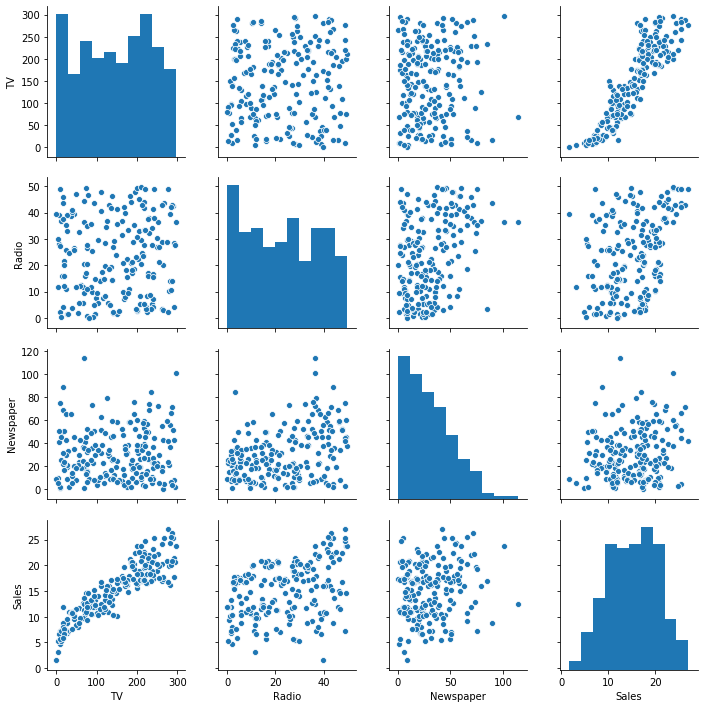

In [15]:
# Outlier Analysis
sns.pairplot(advertising)

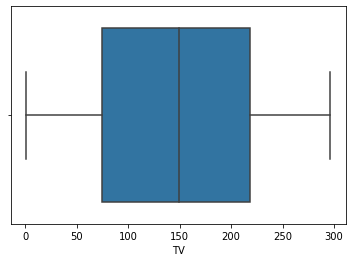

In [22]:
sns.boxplot(advertising.TV)

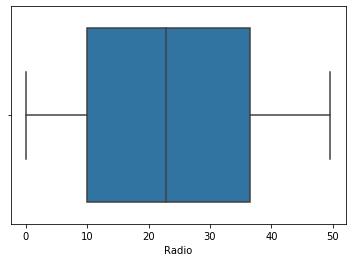

In [20]:
sns.boxplot(advertising.Radio)

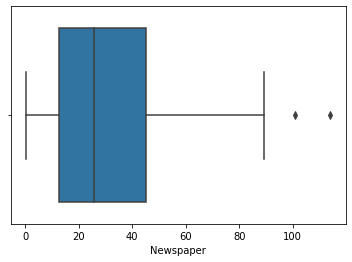

In [24]:
sns.boxplot(advertising.Newspaper)

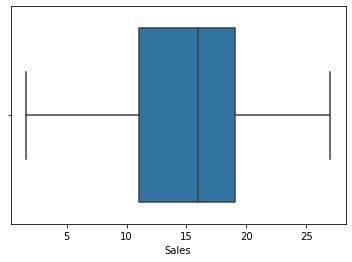

In [25]:
sns.boxplot(advertising.Sales)

In [ ]:
# There are no considerable outliers present in the data.


## Análisis exploratorio

### Análisis univariado

#### Sales (Target)

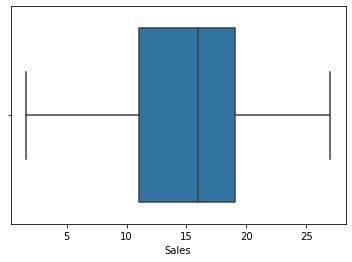

In [26]:
sns.boxplot(advertising['Sales'])
plt.show()

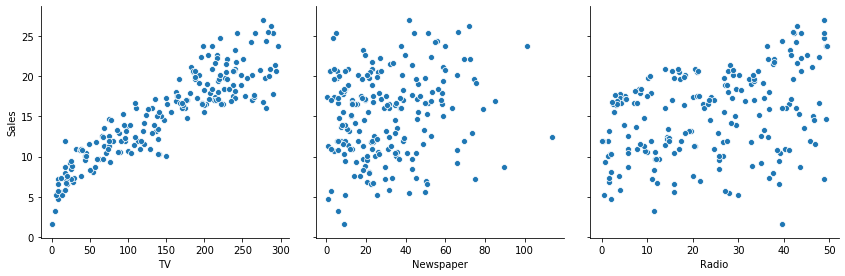

In [27]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

Calcular la matriz de correlación con heatmap

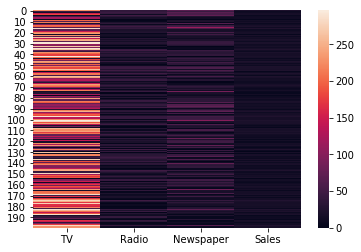

In [28]:
# Let's see the correlation between different variables.
sns.heatmap(advertising)

Como es visible desde el gráfico y el mapa de calor de correlación, la variable `TV` parece estar más correlacionada con` Sales`. Así que sigamos adelante y realicemos una regresión lineal simple usando `TV` como nuestra variable de función.

## Desarrollo del modelo

### Módelo de regresión lineal 

Es un modelo que relaciona una variable independiente (x) con otra dependiente (y).  La relacion es dada por una funcion lineal:

**y = m * x + b**

En nuestro caso:

* **m**: pendiente
* **b**: ordenada al origen

### Pasos generales

Primero asignamos la variable de función, `TV`, en este caso, a la variable` X` y la variable de respuesta, `Ventas`, a la variable` y`.

In [53]:
X = advertising[['TV']]
y = advertising[['Sales']]

#### Train-Test Split

Ahora necesita dividir nuestra variable en conjuntos de entrenamiento y prueba. Realizará esto importando `train_test_split` de la biblioteca` sklearn.model_selection`. Por lo general, es una buena práctica mantener el 70% de los datos en el conjunto de datos del tren y el 30% restante en el conjunto de datos de prueba.

In [54]:
from sklearn.model_selection import train_test_split

In [ ]:
#X_train, X_test, y_train, y_test
#datos_dev, datos_held, objetivo_dev, objetivo_held

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 111)

In [56]:
# Let's now take a look at the train dataset
X_train.head()

,TV
38,43.1
146,240.1
184,253.8
138,43.0
18,69.2


In [57]:
y_train.head()

,Sales
38,10.1
146,18.2
184,17.6
138,9.6
18,11.3


#### Generando el módelo de regresión lineal

Vamos a utilizar la librería sklearn:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [58]:
from sklearn.linear_model import LinearRegression
#X = np.array(X).reshape(-1,1)
#y = np.array(y).reshape(-1,1)

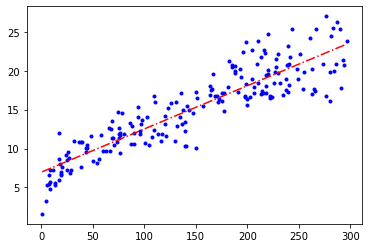

In [59]:
modelo = LinearRegression()
modelo.fit(X, y)

X_new = np.array([X.min(), X.max()])

y_predict = modelo.predict(X_new)

plt.plot(X, y, "b.");
plt.plot(X_new, y_predict, "r-.");

Pendiente

In [60]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
modelo.coef_

array([[0.05546477]])

Ordenada

In [61]:
modelo.intercept_ 

array([6.97482149])

R^2: El 81% de la variance de Sales es explicada por TV

In [63]:
modelo.score(X,y)

0.8121757029987413

## Evaluación del modelo

### Análisis de los residuos
Validar los supuestos del modelo y, por lo tanto, la confiabilidad para la inferencia.

#### Distributción de los errores
Necesitamos verificar si los términos de error también se distribuyen normalmente (lo cual es de hecho, uno de los supuestos principales de la regresión lineal), tracemos el histograma de los términos de error y veamos cómo se ve.

In [64]:
y_train_pred = modelo.predict(X_train)
res = (y_train - y_train_pred)

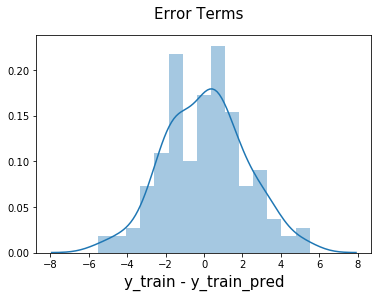

In [65]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

Los residuos siguen el normalmente distribuido con una media 0. ¡Todo bien!

#### Miremos el patrón de los residuos

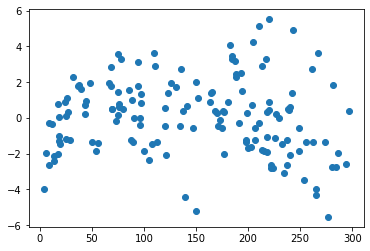

In [66]:
plt.scatter(X_train,res)
plt.show()

Estamos seguros de que el ajuste del modelo no es casual y tiene un poder predictivo decente. La normalidad de los términos residuales permite cierta inferencia sobre los coeficientes.

Aunque, la varianza de los residuos que aumentan con X indica que hay una variación significativa que este modelo no puede explicar.

### Evaluar el set de testeo

In [67]:
# Predict the y values corresponding to X_test_sm
y_pred = modelo.predict(X_test)

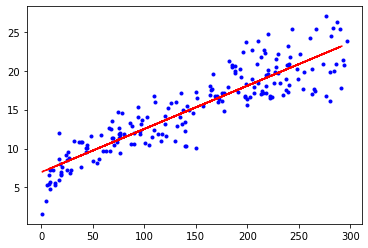

In [68]:
plt.plot(X, y, "b.");
plt.plot(X_test, y_pred, "r-.");

In [69]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### RMSE

In [70]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.7666888569837877

###### Ver el R-2 oen el dataset de testeo

In [71]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8015722887653687

##### Visualicemos escribiendo la ecuación con los parámetros encontrados

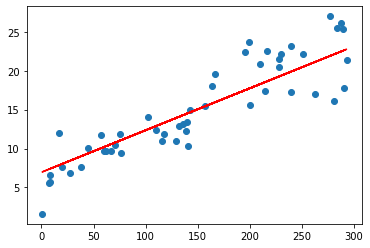

In [72]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

# Cálculando con otra librería

Por defecto, la biblioteca `statsmodels`  ajusta a una recta que pasa por el origen al conjunto de datos. Pero para tener una intercepción, debe usar manualmente el atributo `add_constant` de` statsmodels`. Y una vez que haya agregado la constante a su conjunto de datos `X_train`, puede continuar y ajustar una línea de regresión utilizando el atributo` OLS` (mínimos cuadrados ordinarios) de `statsmodels` como se muestra a continuación

In [73]:
import statsmodels.api as sm
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     671.3
Date:                Thu, 05 Sep 2019   Prob (F-statistic):           7.31e-57
Time:                        20:21:04   Log-Likelihood:                -323.41
No. Observations:                 150   AIC:                             650.8
Df Residuals:                     148   BIC:                             656.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3597      0.347     21.238      0.0

# Regresión Lineal Multiple

veamos rápidamente un ejemple

In [74]:
from sklearn import datasets, linear_model

########## PREPARAR LA DATA REGRESIÓN LINEAL MULTIPLE ##########
#Seleccionamos las columna tv , newspaper and radio
X_multiple = advertising.drop({'Sales'},axis=1)
# print(X_multiple)
#Defino los datos correspondientes a las etiquetas
y_multiple = advertising[['Sales']]
########## IMPLEMENTACIÓN DE REGRESIÓN LINEAL MULTIPLE ##########
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.2)
#Defino el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()
#Entreno el modelo
lr_multiple.fit(X_train, y_train)
#Realizo una predicción
Y_pred_multiple = lr_multiple.predict(X_test)
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('Valor de las pendientes o coeficientes "a":')
print(lr_multiple.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr_multiple.intercept_)
print('R2 del modelo:')
r_squared = r2_score(y_test, Y_pred_multiple)
print(r_squared)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes "a":
[[0.05369261 0.09641825 0.00034796]]
Valor de la intersección o coeficiente "b":
[4.9140711]
R2 del modelo:
0.9176168976008302


Gráfiquemos el valor de Y estimado y observado (relación 1:1)

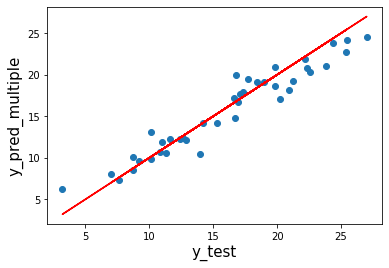

In [75]:
plt.scatter(y_test, Y_pred_multiple)
plt.plot(y_test, y_test, 'r')
plt.xlabel('y_test', fontsize = 15)  
plt.ylabel('y_pred_multiple', fontsize = 15)  
plt.show()